# Neural Networks image recognition - MultiLayer Perceptron
Use both MLNN for the following problem.

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 
3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.

# `np.random.normal`

## Parameters

### loc

Mean (“centre”) of the distribution.

### scale

Standard deviation (spread or “width”) of the distribution. Must be non-negative.

### size

Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if loc and scale are both scalars. Otherwise, np.broadcast(loc, scale).size samples are drawn.

# Neural Networks - Image Recognition 

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

## Multi Layer Neural Network
Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).

In [2]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

11490434/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


In [ ]:
batch_size = 128
num_classes = 10
epochs = 20


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **

In [ ]:
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# add noise
noise = np.random.normal(0, 1, (60000, 784))
x_train_noise = x_train + noise

noise = np.random.normal(0, 1, (10000, 784))
x_test_noise = x_test + noise

x_train /= 255
x_test /= 255
x_train_noise /= 255
x_test_noise /= 255

In [32]:
# Compare images before and after adding noise
print(f"x_train[0]:\n{x_train[0]}")
print(f"x_train_noise[0]:\n{x_train_noise[0]}")
print(f"x_test[0]:\n{x_test[0]}")
print(f"x_test_noise[0]:\n{x_test_noise[0]}")

x_train[0]:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        

In [26]:
import matplotlib.pyplot as  plt
%matplotlib inline

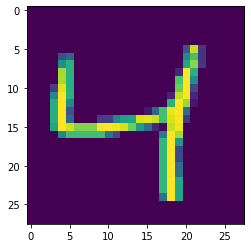

In [33]:
plt.imshow(x_train[2].reshape(28, 28))

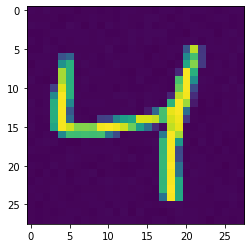

In [34]:
plt.imshow(x_train_noise[2].reshape(28, 28))

2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 

In [36]:
# with same parameters
batch_size = 128
num_classes = 10
epochs = 20


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_noise, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_noise, y_test))
score_noise = model.evaluate(x_test_noise, y_test, verbose=0)
print('Test loss with adding noise:', score_noise[0])
print('Test accuracy with adding noise:', score_noise[1])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [============================

3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.

In [42]:
scales = [0.1, 0.5, 1.0, 2.0, 4.0]
train_scores = [[0] for _ in range(len(scales))]
validation_scores = [[0] for _ in range(len(scales))]
for i in range(len(scales)):
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape(60000, 784)
    x_test = x_test.reshape(10000, 784)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')

    # add noise
    noise = np.random.normal(0, scales[i], (60000, 784))
    x_train_noise = x_train + noise

    noise = np.random.normal(0, scales[i], (10000, 784))
    x_test_noise = x_test + noise

    x_train /= 255
    x_test /= 255
    x_train_noise /= 255
    x_test_noise /= 255

    # build model
    batch_size = 128
    num_classes = 10
    epochs = 20

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy',
                optimizer=RMSprop(),
                metrics=['accuracy'])

    history = model.fit(x_train_noise, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test_noise, y_test))
    train_scores[i] = history.history['accuracy']
    validation_scores[i] = history.history['val_accuracy']
    score_noise = model.evaluate(x_test_noise, y_test, verbose=0)
    print('Test loss with adding noise:', score_noise[0])
    print('Test accuracy with adding noise:', score_noise[1])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 512)               401920    
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 512)               262656    
                                                                 
 dropout_13 (Dropout)        (None, 512)               0         
                                                                 
 dense_20 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [============================

In [47]:
train_scores[0]

[0.9235333204269409,
 0.9687166810035706,
 0.9776166677474976,
 0.9819166660308838,
 0.9849500060081482,
 0.9868166446685791,
 0.9888499975204468,
 0.9897500276565552,
 0.9907000064849854,
 0.9908833503723145,
 0.9924666881561279,
 0.9925833344459534,
 0.9929999709129333,
 0.9940666556358337,
 0.9938666820526123,
 0.9945166707038879,
 0.9944666624069214,
 0.9947666525840759,
 0.9956499934196472,
 0.9955000281333923]

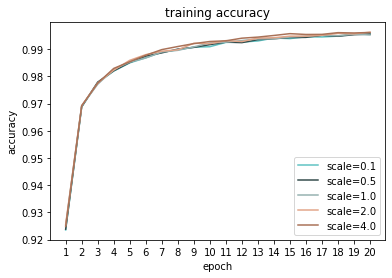

In [53]:
# plot result
colors = ['#5EC2C2', '#324B4B', '#95B1B0', '#E2A589', '#A97157']
for i in range(len(train_scores)):
    score = train_scores[i]
    plt.plot(list(range(1, len(score)+1)), score, color=colors[i], label=f"scale={scales[i]}")
plt.legend()
plt.xlabel("epoch")
plt.xticks(list(range(1, len(score)+1)))
plt.ylabel("accuracy")
plt.title("training accuracy")
plt.show()

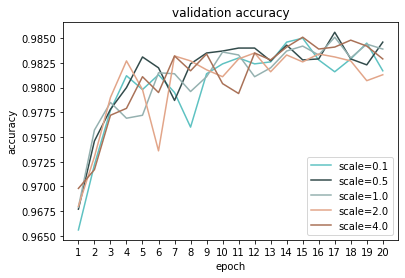

In [54]:
# plot result
colors = ['#5EC2C2', '#324B4B', '#95B1B0', '#E2A589', '#A97157']
for i in range(len(validation_scores)):
    score = validation_scores[i]
    plt.plot(list(range(1, len(score)+1)), score, color=colors[i], label=f"scale={scales[i]}")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.xticks(list(range(1, len(score)+1)))
plt.title("validation accuracy")
plt.show()